In [563]:
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.cluster import KMeansClusterer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import json
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
%matplotlib inline

# 1. Read articles from text file

In [564]:
articles = None
filename = '35_articles(working).txt'
folder_name = 'Local_dataset'
with open(folder_name + '/' + filename) as json_file:  
    articles = json.load(json_file)
df = pd.DataFrame(articles)
df

,authors,body,dataType,date,dateTime,eventUri,image,isDuplicate,lang,sentiment,sim,source,time,title,uri,url,wgt
0,[],Good Friday morning. Here are some of the stor...,news,2019-05-24,2019-05-24T04:22:00Z,None,https://static01.nyt.com/newsgraphics/images/i...,False,eng,-0.113725,0.000000,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",04:22:00,On Politics: The Trade War Is Here to Stay,1144187790,https://www.nytimes.com/2019/05/24/us/politics...,296367720
1,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- The United States and China are ...,news,2019-05-23,2019-05-23T17:39:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/23/bus...,False,eng,-0.200000,0.560784,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",17:39:00,Trump Gives Farmers $16 Billion in Aid Amid Pr...,1143836481,https://www.nytimes.com/2019/05/23/us/politics...,296329140
2,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- The Trump administration is prep...,news,2019-05-23,2019-05-23T12:19:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/23/bus...,False,eng,-0.349020,0.533333,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",12:19:00,Trump Administration to Announce Farm Aid to E...,1143567051,https://www.nytimes.com/2019/05/23/us/politics...,296309940
3,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- President Trump agreed on Friday...,news,2019-05-22,2019-05-22T15:42:00Z,None,https://static01.nyt.com/images/2019/05/17/us/...,False,eng,0.074510,0.000000,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",15:42:00,Trump Lifts Metal Tariffs and Delays Auto Levi...,1142795786,https://www.nytimes.com/2019/05/17/us/politics...,296235720
4,"[{'uri': 'alexandra_stevenson@nytimes.com', 'n...",BEIJING -- President Xi Jinping of China has c...,news,2019-05-22,2019-05-22T03:15:00Z,eng-4801161,https://static01.nyt.com/images/2019/05/22/wor...,False,eng,-0.105882,0.498039,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",03:15:00,China Faces New 'Long March' as Trade War Inte...,1141957321,https://www.nytimes.com/2019/05/21/world/asia/...,296190900
5,"[{'uri': 'keith_bradsher@nytimes.com', 'name':...","A week ago, the United States and China looked...",news,2019-05-21,2019-05-21T21:20:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/09/wor...,False,eng,-0.129412,0.780392,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",21:20:00,Trump Could Raise Tariffs on China. Here's How...,1141791853,https://www.nytimes.com/2019/05/09/business/tr...,296169600
6,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- President Trump escalated his tr...,news,2019-05-21,2019-05-21T21:20:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/09/bus...,False,eng,-0.090196,0.635294,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",21:20:00,Trump Increases China Tariffs as Trade Deal Ha...,1141791852,https://www.nytimes.com/2019/05/09/us/politics...,296169600
7,"[{'uri': 'raymond_zhong@nytimes.com', 'name': ...",BEIJING -- When the United States ratcheted up...,news,2019-05-21,2019-05-21T21:20:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/10/wor...,False,eng,-0.082353,0.552941,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",21:20:00,"China, Defiant but Careful, Promises Aggressiv...",1141791849,https://www.nytimes.com/2019/05/10/business/ch...,296169600
8,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- A yearlong trade war between the...,news,2019-05-21,2019-05-21T21:20:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/12/us/...,False,eng,0.176471,0.470588,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",21:20:00,U.S.-China Trade Standoff May Be Initial Skirm...,1141791846,https://www.nytimes.com/2019/05/11/world/asia/...,296169600
9,"[{'uri': 'li_yuan@nytimes.com', 'name': 'Li Yu...",Wu Shichun is one of countless Chinese entrepr...,news,2019-05-21,2019-05-21T21:20:00Z,None,https://static01.nyt.com/images/2019/05/14/bus...,False,eng,0.003922,0.000000,"{'ur

# 2. Text processing

In [565]:
lemmatizer = WordNetLemmatizer()
def process_text(text):
    words = nltk.word_tokenize(text)
    words = [w.lower() for w in words]
    words = [w.translate(str.maketrans('', '', string.punctuation)) for w in words]
    words = [w for w in words if w not in nltk.corpus.stopwords.words('english')]
    words = [lemmatizer.lemmatize(w) for w in words]
    words = [w for w in words if w.isalnum()] 
    new_text = " ".join(words)
    return new_text

# 2.a Process "body" of the article

In [566]:
df['body_processed'] = [process_text(b) for b in df['body']]
print(df.shape)
df

(35, 18)


,authors,body,dataType,date,dateTime,eventUri,image,isDuplicate,lang,sentiment,sim,source,time,title,uri,url,wgt,body_processed
0,[],Good Friday morning. Here are some of the stor...,news,2019-05-24,2019-05-24T04:22:00Z,None,https://static01.nyt.com/newsgraphics/images/i...,False,eng,-0.113725,0.000000,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",04:22:00,On Politics: The Trade War Is Here to Stay,1144187790,https://www.nytimes.com/2019/05/24/us/politics...,296367720,good friday morning story making news washingt...
1,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- The United States and China are ...,news,2019-05-23,2019-05-23T17:39:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/23/bus...,False,eng,-0.200000,0.560784,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",17:39:00,Trump Gives Farmers $16 Billion in Aid Amid Pr...,1143836481,https://www.nytimes.com/2019/05/23/us/politics...,296329140,washington united state china digging prolonge...
2,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- The Trump administration is prep...,news,2019-05-23,2019-05-23T12:19:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/23/bus...,False,eng,-0.349020,0.533333,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",12:19:00,Trump Administration to Announce Farm Aid to E...,1143567051,https://www.nytimes.com/2019/05/23/us/politics...,296309940,washington trump administration preparing anno...
3,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- President Trump agreed on Friday...,news,2019-05-22,2019-05-22T15:42:00Z,None,https://static01.nyt.com/images/2019/05/17/us/...,False,eng,0.074510,0.000000,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",15:42:00,Trump Lifts Metal Tariffs and Delays Auto Levi...,1142795786,https://www.nytimes.com/2019/05/17/us/politics...,296235720,washington president trump agreed friday lift ...
4,"[{'uri': 'alexandra_stevenson@nytimes.com', 'n...",BEIJING -- President Xi Jinping of China has c...,news,2019-05-22,2019-05-22T03:15:00Z,eng-4801161,https://static01.nyt.com/images/2019/05/22/wor...,False,eng,-0.105882,0.498039,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",03:15:00,China Faces New 'Long March' as Trade War Inte...,1141957321,https://www.nytimes.com/2019/05/21/world/asia/...,296190900,beijing president xi jinping china called chin...
5,"[{'uri': 'keith_bradsher@nytimes.com', 'name':...","A week ago, the United States and China looked...",news,2019-05-21,2019-05-21T21:20:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/09/wor...,False,eng,-0.129412,0.780392,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",21:20:00,Trump Could Raise Tariffs on China. Here's How...,1141791853,https://www.nytimes.com/2019/05/09/business/tr...,296169600,week ago united state china looked going reach...
6,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- President Trump escalated his tr...,news,2019-05-21,2019-05-21T21:20:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/09/bus...,False,eng,-0.090196,0.635294,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",21:20:00,Trump Increases China Tariffs as Trade Deal Ha...,1141791852,https://www.nytimes.com/2019/05/09/us/politics...,296169600,washington president trump escalated trade war...
7,"[{'uri': 'raymond_zhong@nytimes.com', 'name': ...",BEIJING -- When the United States ratcheted up...,news,2019-05-21,2019-05-21T21:20:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/10/wor...,False,eng,-0.082353,0.552941,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",21:20:00,"China, Defiant but Careful, Promises Aggressiv...",1141791849,https://www.nytimes.com/2019/05/10/business/ch...,296169600,beijing united state ratcheted trade tension b...
8,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- A yearlong trade war between the...,news,2019-05-21,2019-05-21T21:20:00Z,eng-4800969,https://static01.nyt.com/images/2019/05/12/us/...,False,eng,0.176471,0.470

# (Optional) Split articles (i.e. old articles vs new article)

In [567]:
# df_new =df.iloc[:1,:]
# df_old = df.iloc[1:,:]

# LDA

In [568]:
df['date'] =pd.to_datetime(df['date'])
df.index = df['date']
df = df.sort_index(ascending=True)
df

,authors,body,dataType,date,dateTime,eventUri,image,isDuplicate,lang,sentiment,sim,source,time,title,uri,url,wgt,body_processed
date,,,,,,,,,,,,,,,,,,
2019-05-11,"[{'uri': 'ana_swanson@nytimes.com', 'name': 'A...",WASHINGTON -- A yearlong trade war between the...,news,2019-05-11,2019-05-11T17:22:00Z,eng-4782070,https://static01.nyt.com/images/2019/05/12/us/...,False,eng,0.176471,0.572549,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",17:22:00,Trade Standoff May Be Initial Skirmish in Broa...,1133687142,https://www.nytimes.com/2019/05/11/world/asia/...,295291320,washington yearlong trade war united state chi...
2019-05-11,"[{'uri': 'paul_krugman@nytimes.com', 'name': '...","O.K., they weren't supposed to start the trade...",news,2019-05-11,2019-05-11T10:55:00Z,None,https://static01.nyt.com/newsgraphics/images/i...,False,eng,-0.105882,0.000000,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",10:55:00,Opinion | Killing the Pax Americana,1133500178,https://www.nytimes.com/2019/05/11/opinion/kil...,295268100,ok nt supposed start trade war got back vacati...
2019-05-12,"[{'uri': 'mark_landler@nytimes.com', 'name': '...",WASHINGTON -- President Trump's chief economic...,news,2019-05-12,2019-05-12T18:59:00Z,eng-4783551,https://static01.nyt.com/images/2019/05/12/us/...,False,eng,-0.121569,0.596078,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",18:59:00,"Kudlow Breaks With Trump, Saying 'Both Sides W...",1134310973,https://www.nytimes.com/2019/05/12/us/politics...,295383540,washington president trump chief economic advi...
2019-05-13,"[{'uri': 'jeanna_smialek@nytimes.com', 'name':...",WASHINGTON -- President Trump's chief economic...,news,2019-05-13,2019-05-13T00:33:00Z,eng-4783551,https://static01.nyt.com/images/2019/05/13/bus...,False,eng,-0.145098,0.600000,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",00:33:00,Trump's Trade War Escalation Will Exact Econom...,1134435707,https://www.nytimes.com/2019/05/12/us/politics...,295403580,washington president trump chief economic advi...
2019-05-13,"[{'uri': 'jim_tankersley@nytimes.com', 'name':...",An escalation of the president's trade war wit...,news,2019-05-13,2019-05-13T23:21:00Z,eng-4783551,https://static01.nyt.com/images/2019/05/13/us/...,False,eng,0.003922,0.439216,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",23:21:00,"Toys, Phones and Sneakers: The Chinese Goods T...",1135262132,https://www.nytimes.com/2019/05/13/business/to...,295485660,escalation president trade war china poised hi...
2019-05-14,"[{'uri': 'trish_bendix@nytimes.com', 'name': '...","Welcome to Best of Late Night, a rundown of th...",news,2019-05-14,2019-05-14T07:17:00Z,None,https://static01.nyt.com/images/2019/05/14/art...,False,eng,0.176471,0.000000,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",07:17:00,Stephen Colbert Says It's Too Late to Rebrand ...,1135491778,https://www.nytimes.com/2019/05/14/arts/televi...,295514220,welcome best late night rundown previous night...
2019-05-14,"[{'uri': 'neil_irwin@nytimes.com', 'name': 'Ne...",There's a shrinking supply of the 'constructiv...,news,2019-05-14,2019-05-14T15:13:00Z,eng-4783551,https://static01.nyt.com/images/2019/05/14/ups...,False,eng,0.215686,0.439216,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",15:13:00,Why the U.S.-China Trade War Could Be Long and...,1135855417,https://www.nytimes.com/2019/05/14/upshot/us-c...,295542780,shrinking supply constructive ambiguity would ...
2019-05-14,"[{'uri': 'li_yuan@nytimes.com', 'name': 'Li Yu...",Wu Shichun is one of countless Chinese entrepr...,news,2019-05-14,2019-05-14T16:25:00Z,eng-4783551,https://static01.nyt.com/images/2019/05/14/bus...,False,eng,0.003922,0.470588,"{'uri': 'nytimes.com', 'dataType': 'news', 'ti...",16:25:00,"In China, Some Fear the End of 'Chimerica'",1135913781,https://www.nytimes.com/2019/05/14/business/ch...,295547100,wu shichun one countless chinese entrepreneur ...
2019-05-14,"[{'uri': 'li_yuan@nytimes.com', 'name': 'Li Yu...",Wu Shichun is one of countless C

In [569]:
topics = int(df.shape[0]/3) + 1

# vect=CountVectorizer(ngram_range=(1,1),max_features=10000).fit(df['body'])
# vect=TfidfVectorizer(sublinear_tf=True,ngram_range=(2,3),max_df=0.7).fit(df['body'])
vect=TfidfVectorizer(sublinear_tf=True,ngram_range=(2,3),max_df=0.7).fit(df['body_processed'])
X_train = vect.transform(df['body_processed'])
lda = LatentDirichletAllocation(n_components=topics,random_state=0,max_iter=400,learning_method='batch')
lda.fit(X_train)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=400, mean_change_tol=0.001,
             n_components=12, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [570]:
def print_LDA_results(lda_model, feature_names, n_top_words=50):
    for topic_idx, topic in enumerate(lda_model.components_):
        message = "Topic %d: " % topic_idx
        message += " ".join([("*" + feature_names[i] + "*")
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()

In [571]:
print_LDA_results(lda,vect.get_feature_names())

Topic 0: *stephen colbert* *kudlow said* *maybe something* *jimmy fallon* *mr kudlow* *pete buttigieg* *adviser larry kudlow* *adviser larry* *james corden* *late night* *seth meyers* *maybe something happen* *something happen* *white house* *chinese law* *mr kudlow said* *christmas tree* *mattress support* *tree light* *christmas tree light* *big tariff* *newspaper said* *president xi jinping* *president xi* *ca nt* *said sunday* *trump already* *trade war going* *war going* *dog collar* *fox news* *tariff could* *xi jinping* *trump said* *mr trump added* *trump added* *thing mr* *larry kudlow* *chief economic adviser* *chief economic* *change chinese* *change chinese law* *american business* *state mr* *united state mr* *draft agreement* *much trade* *china want* *side pay* *tariff increase*

Topic 1: *mr shorten* *300 billion worth* *whether impose* *trade talk* *apple inc* *new low* *billion worth* *impose tariff* *prime minister* *chinese good* *auto tariff* *includes nearly* *fac

In [572]:
transformed = lda.transform(X_train)
transformed

array([[0.00180732, 0.00180732, 0.00180732, 0.00180732, 0.00180732,
        0.00180732, 0.00180732, 0.00180733, 0.98011949, 0.00180732,
        0.00180732, 0.00180732],
       [0.00221101, 0.00221101, 0.00221101, 0.00221101, 0.00221101,
        0.97567886, 0.00221101, 0.00221102, 0.00221101, 0.00221101,
        0.00221101, 0.00221101],
       [0.97349495, 0.00240954, 0.00240954, 0.00240954, 0.00240955,
        0.00240955, 0.00240954, 0.00240957, 0.00240955, 0.00240954,
        0.00240956, 0.00240955],
       [0.00184286, 0.00184284, 0.00184283, 0.00184283, 0.97972876,
        0.00184284, 0.00184283, 0.00184285, 0.00184283, 0.00184283,
        0.00184287, 0.00184284],
       [0.00298786, 0.96713353, 0.00298786, 0.00298786, 0.00298786,
        0.00298786, 0.00298786, 0.00298786, 0.00298786, 0.00298786,
        0.00298787, 0.00298786],
       [0.97051658, 0.00268031, 0.00268031, 0.00268031, 0.00268031,
        0.00268031, 0.00268031, 0.00268031, 0.00268031, 0.00268031,
        0.00268031,

In [573]:
for i in range(len(transformed)):
    max_num = -99
    max_index = -99
    for j in range(len(transformed[i])):
        if transformed[i][j] >= max_num:
            max_num = transformed[i][j]
            max_index = j
    print(i)
    print('max topic: ' + str(max_index))

0
max topic: 8
1
max topic: 5
2
max topic: 0
3
max topic: 4
4
max topic: 1
5
max topic: 0
6
max topic: 5
7
max topic: 7
8
max topic: 7
9
max topic: 9
10
max topic: 7
11
max topic: 10
12
max topic: 10
13
max topic: 1
14
max topic: 1
15
max topic: 8
16
max topic: 6
17
max topic: 10
18
max topic: 1
19
max topic: 9
20
max topic: 10
21
max topic: 4
22
max topic: 5
23
max topic: 1
24
max topic: 7
25
max topic: 8
26
max topic: 6
27
max topic: 0
28
max topic: 10
29
max topic: 9
30
max topic: 11
31
max topic: 11
32
max topic: 11
33
max topic: 9
34
max topic: 10


In [574]:
link = df.iloc[32]['url']
print(link)

https://www.nytimes.com/2019/05/23/us/politics/farm-aid-package.html


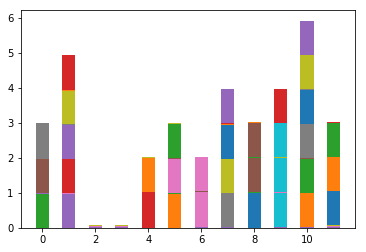

In [575]:
x=range(0, topics)
prev = None
first = True
width = 0.5
bars = []
for i in range(len(transformed)): 
    p = plt.bar(x, transformed[i], width, bottom=prev)
    if first:
        prev = transformed[i]
        first = False
    else:
        prev += transformed[i]
    bars.append(p)
    
articles_num = range(1,len(transformed)+1)
# plt.legend([p[0] for p in bars],[a for a in articles_num])

In [576]:
test_para_processed=[]
test_para_processed.extend(df.iloc[df.shape[0]-1]['body'].split('\n\n'))
for i in range(len(test_para_processed)):
    test_para_processed[i] = process_text(test_para_processed[i])

In [577]:
X_test = vect.transform(test_para_processed)
transformed = lda.transform(X_test)

[0.01236049 0.01236049 0.01236049 0.01236049 0.01236049 0.01236052
 0.01236049 0.01236051 0.01236049 0.0123605  0.86403448 0.01236057]


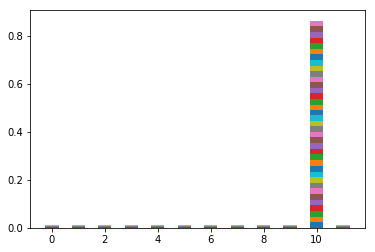

In [578]:
plt.figure()

total=0
for t in transformed:
    for v in t:
        total += v

x=range(0, topics)
prev = None
first = True
width = 0.5
bars = []
for i in range(len(transformed)): 
    p = plt.bar(x, transformed[i]/total, width, bottom=prev)
    if first:
        prev = transformed[i]/total
        first = False
    else:
        prev += transformed[i]/total
    bars.append(p)

print(prev)
articles_num = range(1,len(transformed)+1)
# plt.legend([p[0] for p in bars],[a for a in articles_num])

In [579]:
for i in range(len(transformed)):
    max_num = -99
    max_index = -99
    for j in range(len(transformed[i])):
        if transformed[i][j] >= max_num:
            max_num = transformed[i][j]
            max_index = j
    if max_index != 1:
        print(test_para_processed[i])
        print('max topic: ' + str(max_index))

osseo wi start president trump combative trade strategy toward china carried promise shortterm pain inflicted farmer would worth longerterm gain american producer agriculture technology
max topic: 10
trade war intensifies faith proposition among president stalwart rural fan tested ever
max topic: 10
long shortterm shane goplin sixthgeneration farmer growing soybean corn westcentral wisconsin wondered maneuvered 16row john deere planter
max topic: 10
china largest buyer american soybean titfortat tariff halted flow month souring prospect trade deal sent price tumbling mr trump responded thursday announcing 16 billion package help hurt dispute
max topic: 10
strategy may help shore farmer support mr trump 2020 election leaf perplexing question success ultimately look like
max topic: 10
despite strain mr goplin family bank account peace mind back president tactic get said tractor whir beep america bullied trade war persisted election next year added would ok
max topic: 10
federal help impo